# Import libaries needed

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math

sns.set(style="whitegrid")

# Import and process the data

In [2]:
df = pd.read_csv("master.csv", thousands = ",")
print(df.info())
print("=================================================")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB
None


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


In [113]:
# Data cleaning and processing
new_names = {"35-54 years": "35-54", "55-74 years": "55-74", "25-34 years" : "25-34", "15-24 years": "15-24", "75+ years": "75-100", "5-14 years": "05-14"}
df.replace(new_names, inplace = True)
df.rename(columns = {" gdp_for_year ($) ": "gdp_year", "gdp_per_capita ($)": "gdp_capita"}, inplace = True)
df["suicides_rate"] = df["suicides_no"] / df["population"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
df = df[df["year"] != 2016]    # The data in 2016 is not complete

In [114]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_year,gdp_capita,suicides_rate
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,4.471009e+11,16815.568330,0.000128
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,1.457574e+12,18861.585497,0.000190
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000,0.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,8.976208e+09,3436.000000,0.000009
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,4.801361e+10,9283.000000,0.000060
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,2.602024e+11,24796.000000,0.000166
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000,0.002250


In [15]:
print(df['age'].unique())
print(df['generation'].unique())
print(df["country"].unique())

['15-24' '35-54' '75-100' '25-34' '55-74' '05-14']
['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway' 'Oman'
 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico'
 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 

# Exploratory Data Analysis

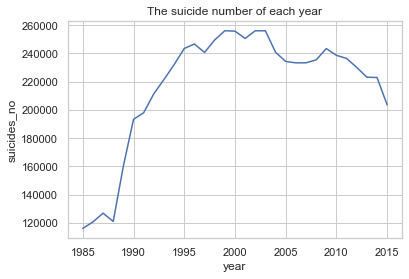

In [90]:
# Group the data with year, see the suicide trend with years
df_year = df.groupby(by = "year").sum().reset_index()

sns.lineplot(x = "year", y = "suicides_no", data = df_year)
plt.title("The suicide number of each year")
plt.show()

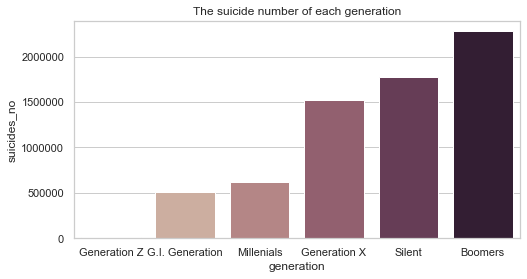

In [91]:
# Group the data with generation
df_gen = df.groupby(by = "generation").sum().reset_index().sort_values(by = "suicides_no")

fig_dim = (8, 4)
fig, ax = plt.subplots(figsize = fig_dim)
sns.barplot(x = "generation", y = "suicides_no", data = df_gen, palette="ch:.25", ax = ax)
plt.title("The suicide number of each generation")
plt.show()

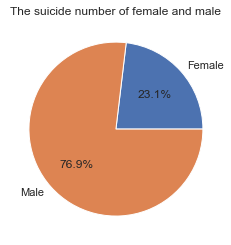

In [92]:
# Group the data with gender
df_gender = df.groupby(by = "sex").sum().reset_index().sort_values(by = "suicides_no")

sex_suicide_num = [int(df_gender[df_gender["sex"] == "female"]["suicides_no"]), int(df_gender[df_gender["sex"] == "male"]["suicides_no"])]
plt.pie(sex_suicide_num, labels = ["Female", "Male"], autopct='%1.1f%%')
plt.title("The suicide number of female and male")
plt.show()

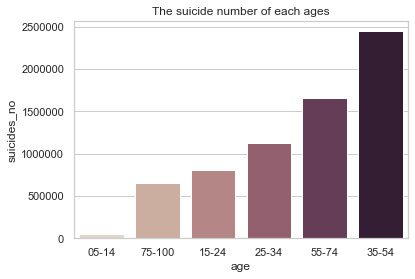

In [93]:
# Group the data with age
df_age = df.groupby(by = "age").sum().reset_index().sort_values(by = "suicides_no")

sns.barplot(x = "age", y = "suicides_no", data = df_age, palette="ch:.25")
plt.title("The suicide number of each ages")
plt.show()

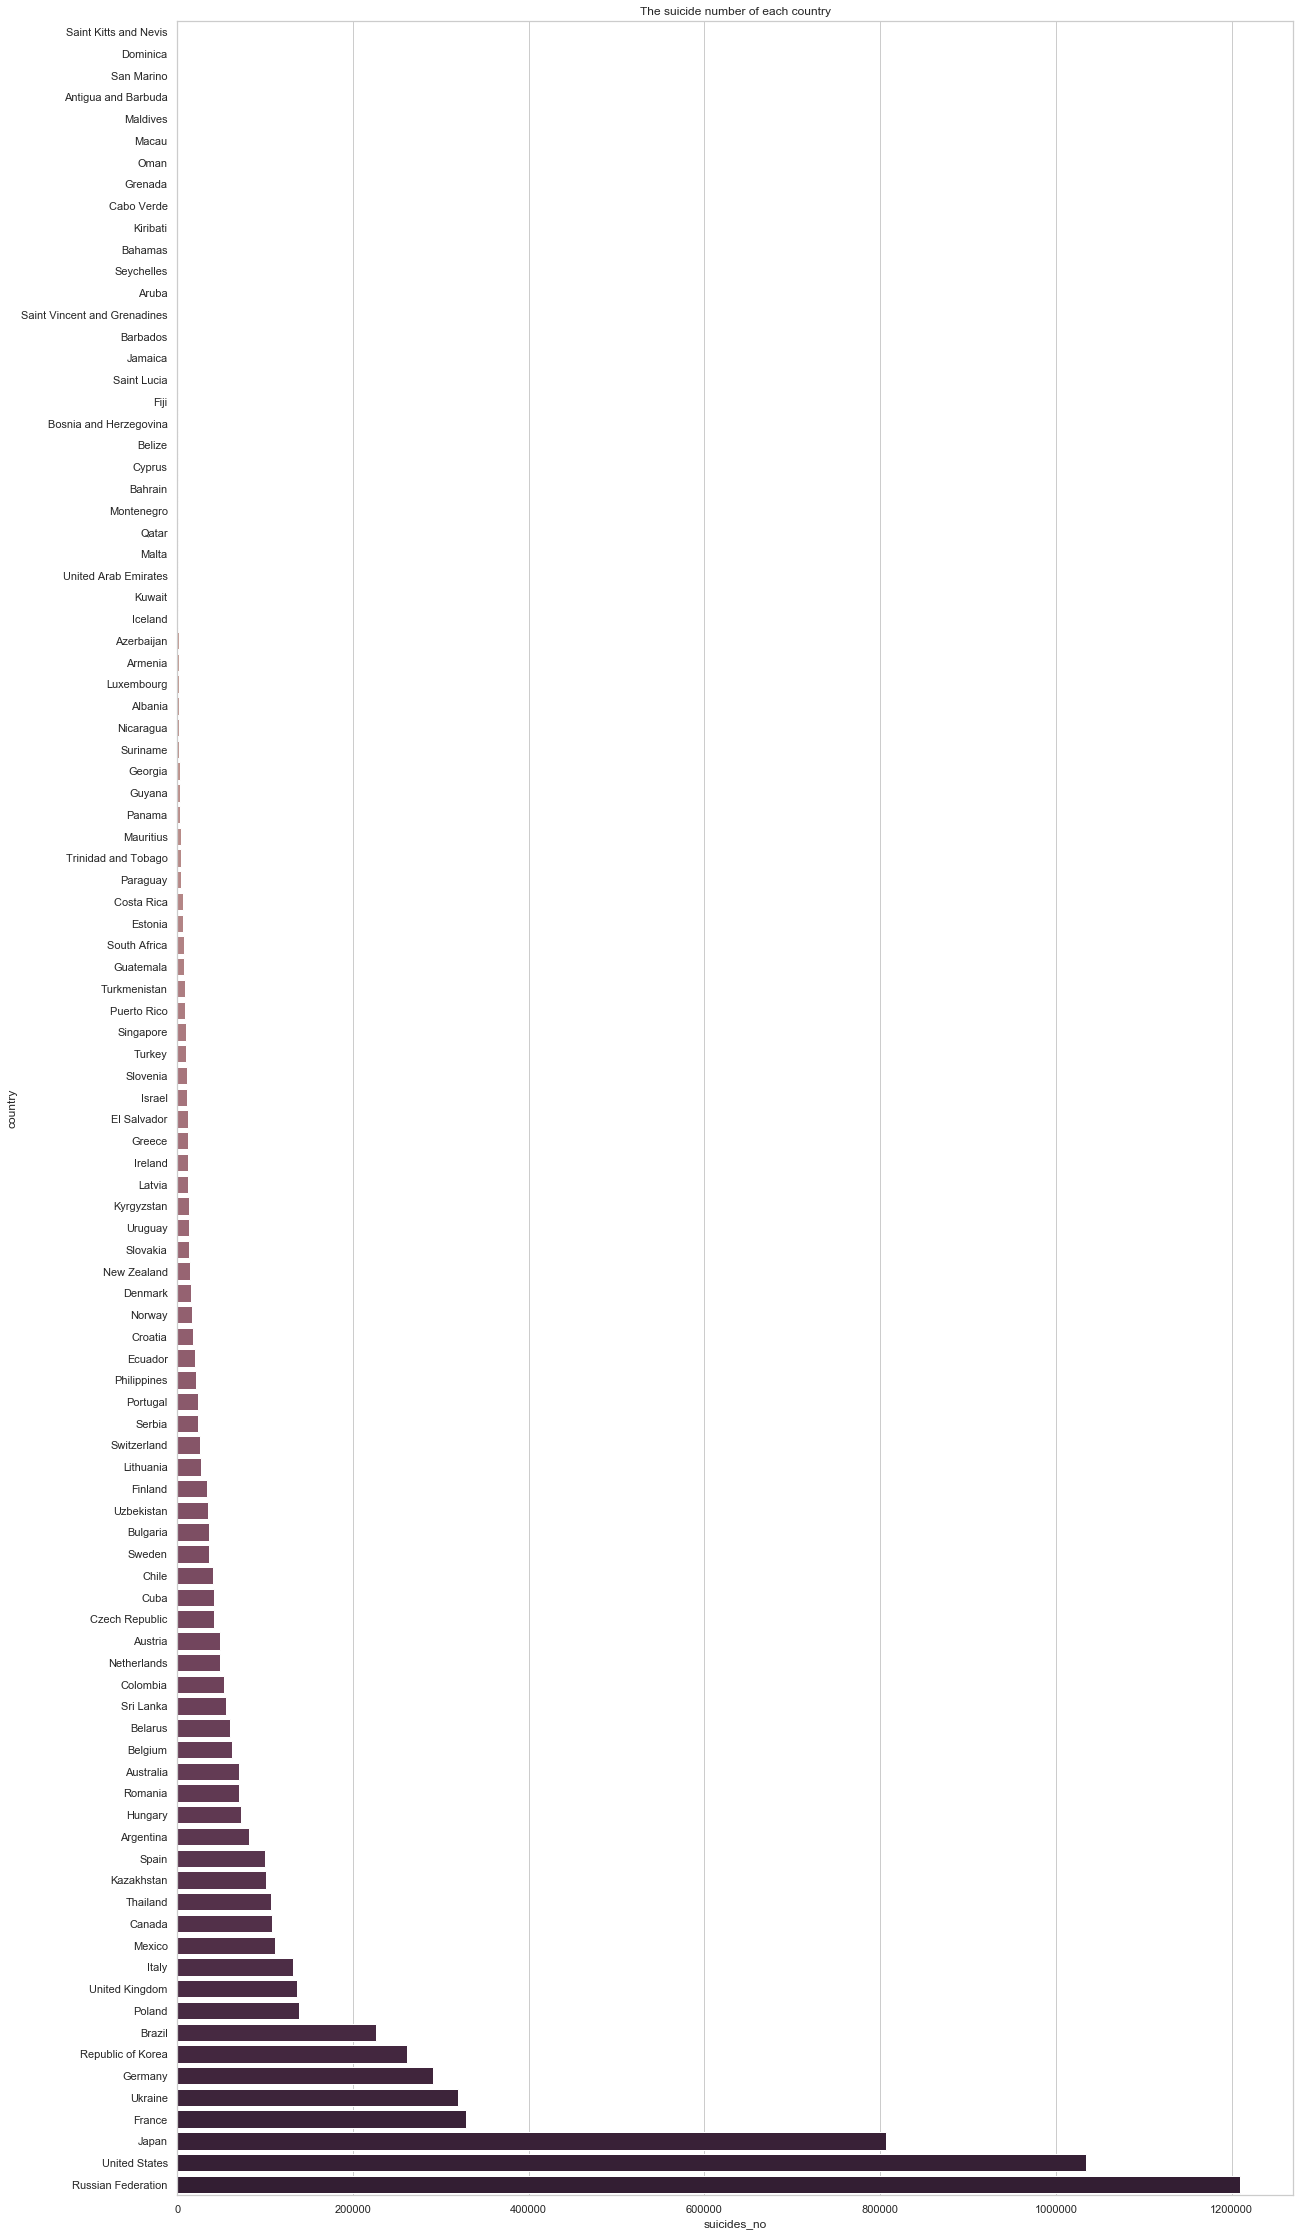

In [109]:
# Group the data with country
df_con = df.groupby(by = "country").sum().reset_index().sort_values(by = "suicides_no")

fig_dim = (20, 40)
fig, ax = plt.subplots(figsize = fig_dim)
sns.barplot(x = "suicides_no", y = "country", data = df_con, palette="ch:.25", ax = ax)
plt.title("The suicide number of each country")
plt.show()

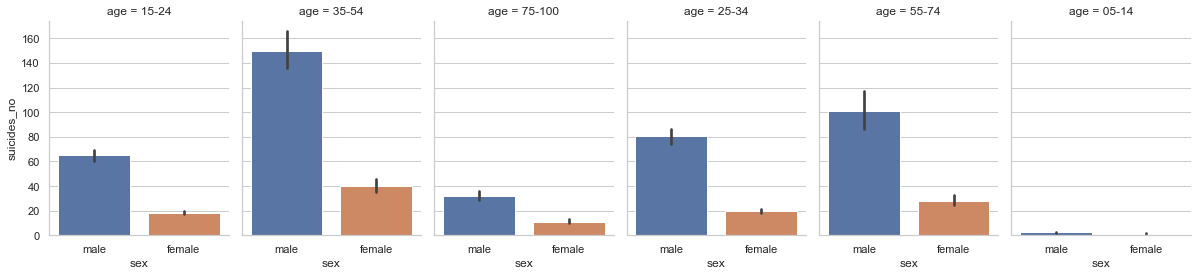

In [96]:
# Check the plot of age and gender
sns.catplot(x='sex', y='suicides_no', col='age', data=df, estimator=np.median, height=4, aspect=.7, kind='bar')
plt.show()
# With all ages, male has higher suicide numbers

In [20]:

df["suicides_no"].corr(df["gdp_capita"])

0.06132974884024558

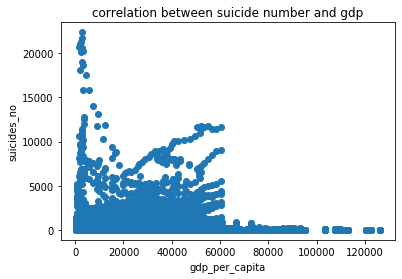

In [21]:
plt.scatter(x = df["gdp_capita"], y = df["suicides_no"])
plt.xlabel("gdp_per_capita")
plt.ylabel("suicides_no")
plt.title("correlation between suicide number and gdp")
plt.show()

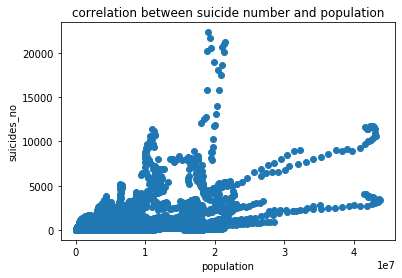

In [22]:
plt.scatter(x = df["population"], y = df["suicides_no"])
plt.xlabel("population")
plt.ylabel("suicides_no")
plt.title("correlation between suicide number and population")
plt.show()

In [23]:
df["suicides_no"].corr(df["population"])

0.6161622675219287

In [51]:
ztest ,pval = stests.ztest(df[df["sex"] == "male"]["suicides_no"], 
                           x2 = df[df["sex"] == "female"]["suicides_no"], 
                           value=0, 
                           alternative='two-sided')

print(round(pval, 5))
print(abs(ztest))

if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
24.378626630539273
reject null hypothesis


In [53]:
F, p = stats.f_oneway(df[df["age"] == "05-14"]["suicides_no"], 
                      df[df["age"] == "15-24"]["suicides_no"], 
                      df[df["age"] == "25-34"]["suicides_no"], 
                      df[df["age"] == "35-54"]["suicides_no"], 
                      df[df["age"] == "55-74"]["suicides_no"], 
                      df[df["age"] == "75-100"]["suicides_no"])

print("F:", round(F, 3))
print("p:", round(p, 5))

F: 192.284
p: 0.0


In [50]:
ztest ,pval = stests.ztest(df[df["country"] == "Japan"]["suicides_no"], 
                           x2 = df[df["country"] == "United States"]["suicides_no"], 
                           value=0, 
                           alternative='two-sided')

print(round(pval, 5))
print(abs(ztest))

if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.00078
3.3588304368266257
reject null hypothesis


In [164]:
ztest ,pval = stests.ztest(df[df["country"] == "Japan"]["suicides_no"], 
                           x2 = df[df["country"] == "Republic of Korea"]["suicides_no"], 
                           value=0, 
                           alternative='two-sided')

print(round(pval, 5))

if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [165]:
ztest ,pval = stests.ztest(df[df["country"] == "Japan"]["suicides_no"], 
                           x2 = df[df["country"] == "Mexico"]["suicides_no"], 
                           value=0, 
                           alternative='two-sided')

print(round(pval, 5))

if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis
